# <font color='red'> **Time Series Analysis of Superstore Sales Data**

### Project submission group
- Group member 1
    - Name: Hemachandar Nagarajan
    - Email: hn395@drexel.edu
- Group member 2
    - Name: Pinkesh Nayak
    - Email: prn33@drexel.edu
- Group member 3
    - Name: Padma Priya Jayaraj
    - Email: pj349@drexel.edu

# **Exploratory Data Analysis**

Data Source: https://www.kaggle.com/rohitsahoo/sales-forecasting

## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [5]:
list(data.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [6]:
data.shape

(9800, 18)

## Description of the Data
We have a sales dataset of 9800 rows and 18 columns. The feature variables are:  
* **Row ID**: Integer Categorical variable that refers to the specific piece being reviewed. 
* **Order ID**: Integer Categorical variable that refers to the specific piece being ordered.
* **Order Date**: Date of the order.
* **Ship Date**: Shipping date.
* **Ship Mode**: Shipping Mode.
* **Customer ID**: Integer Categorical variable that refers to the customer.
* **Customer Name**: Name of the specific customer.
* **Segment**: Segment through which the order is placed.
* **Country**: Country at which the order is made from.
* **City**: City at which the order is made from.
* **State**: State at which the order is made from.
* **Postal Code**: Postal code of the place of order.
* **Region**: Region at which the order is made from.
* **Product ID**: Integer Categorical variable that refers to the specific product being ordered.
* **Category**: Category to which the order belongs to.
* **Sub-Category**: Sub-category to which the order belongs to.
* **Product Name**: Name of the product being ordered.
* **Sales**: Price of the product in US dollars.

In [7]:
data.describe()
#Summary Statitics of the numerical columns

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

* `Order Date` and `Ship Date` are as strings. We can convert them into datetime objects in the preprocessing stage. 
* `Postal code` should be as object instead of float64 
* Rest of the columns are in the correct format.
* `Row ID` can be removed in the preprocessing stage as it is of no use.

## **Check for Missing Values**

In [9]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

As you can see there are 11 missing values in the postal code column. Instead of dropping them we can add those postcode using their respective cities.

## Outlier Detection

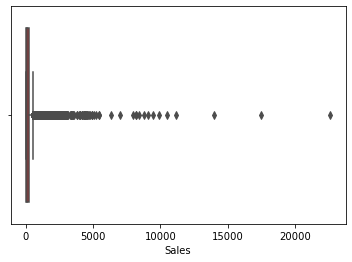

In [10]:
sns.boxplot(x= data['Sales'], color ='r')

From the boxplot the mean sale is around 230 as shown from the `data.describe()` above. The are quite a number of extreme points above the whiskers indicating these are the ouliers present in the sale feature. We will decide how to handle these outliers in the data preprocessing stage. 

## Distribution of the Continuous Variables

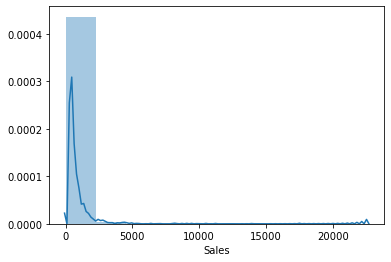

In [11]:
sns.distplot(data['Sales'], bins=10)

## Ordinal and Categorical Data

## Univariate Analysis

In [12]:
data["Ship Mode"].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

Text(0, 0.5, 'Number of Orders')

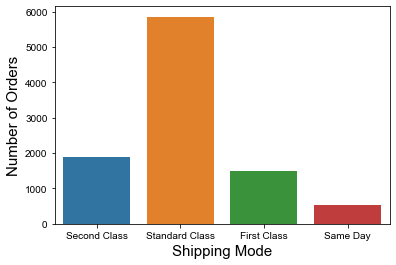

In [13]:
sns.countplot(x='Ship Mode', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Shipping Mode", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [14]:
data["Segment"].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

Text(0, 0.5, 'Number of Orders')

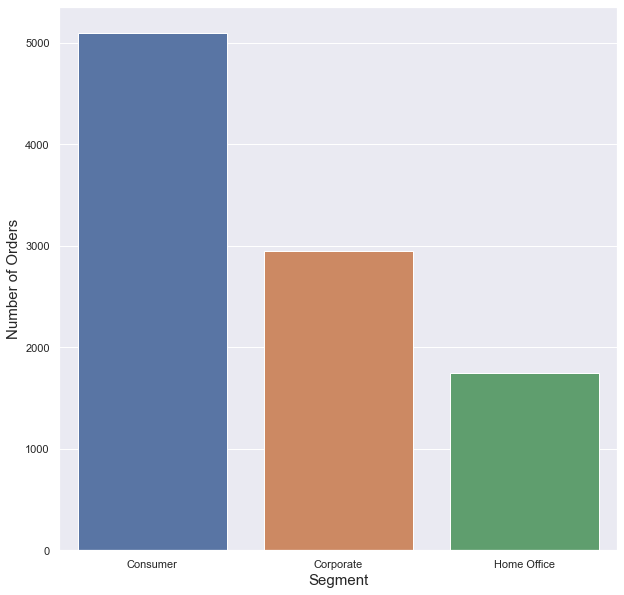

In [15]:
sns.countplot(x='Segment', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Segment", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [16]:
data["Country"].value_counts()
# All the orders were from US

United States    9800
Name: Country, dtype: int64

In [17]:
data["City"].value_counts().head(5)
# Top 5 cities based on number of orders

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Name: City, dtype: int64

Text(0, 0.5, 'Number of Orders')

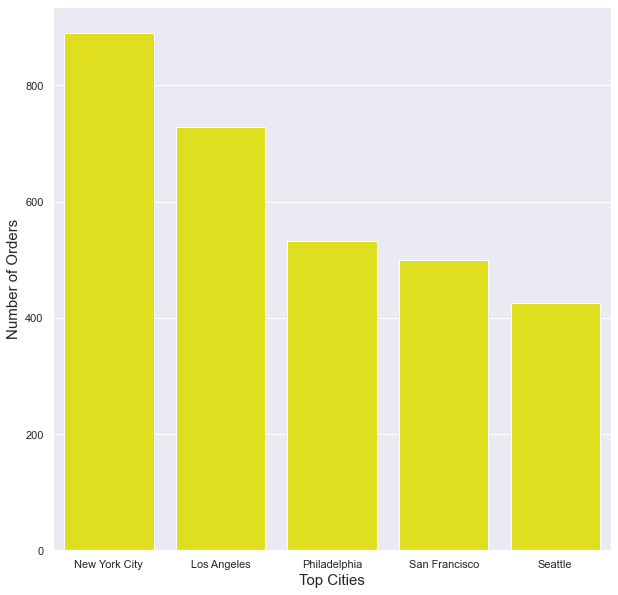

In [18]:
sns.barplot(data["City"].value_counts().head(5).index, data["City"].value_counts().head(5).values, color = "yellow")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Top Cities", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [19]:
data["State"].value_counts().head(5)

California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: State, dtype: int64

Text(0, 0.5, 'Number of Orders')

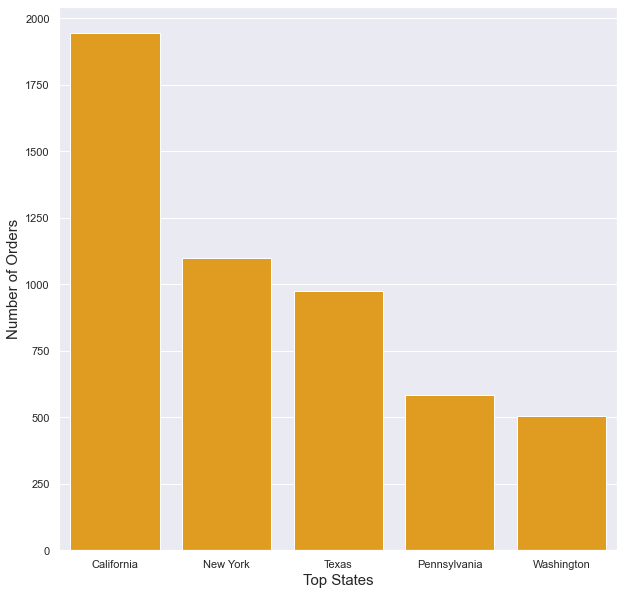

In [20]:
sns.barplot(data["State"].value_counts().head(5).index, data["State"].value_counts().head(5).values, color = "orange")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Top States", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [21]:
data["Region"].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

Text(0, 0.5, 'Number of Orders')

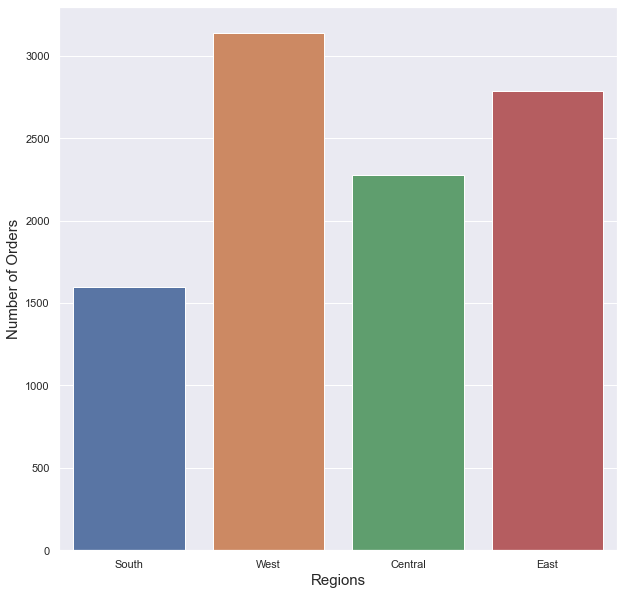

In [22]:
sns.countplot(x='Region', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Regions", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [23]:
data["Category"].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x1d1e463bbe0>,
 [Text(-1.0429569653777424, -0.34962947297110203, 'Office Supplies'),
  Text(1.063665639407231, -0.28038439247648367, 'Furniture'),
  Text(0.6039252788429316, 0.9193879798944989, 'Technology')],
 [Text(-0.5688856174787685, -0.19070698525696472, '60.3%'),
  Text(0.5801812578584895, -0.15293694135080924, '21.2%'),
  Text(0.3294137884597808, 0.5014843526697266, '18.5%')])

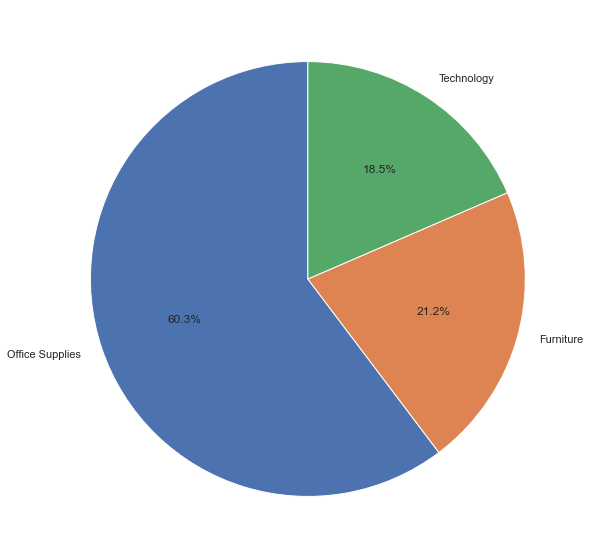

In [24]:
fig,axis = plt.subplots()
x = list(data['Category'].value_counts().index)
y = list(data['Category'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90 )

In [25]:
data["Sub-Category"].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

Text(0, 0.5, 'Sub-Category')

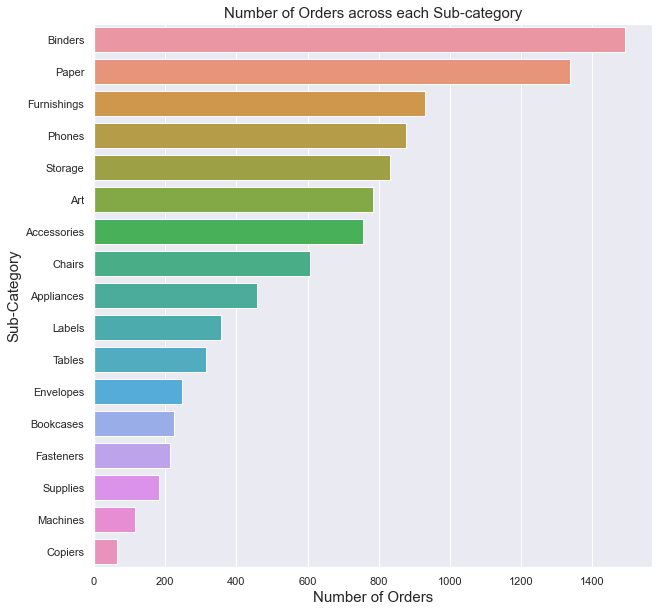

In [26]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(y="Sub-Category", data=data,order=data["Sub-Category"].value_counts().index)
plt.title("Number of Orders across each Sub-category", fontsize = 15)
plt.xlabel("Number of Orders", fontsize = 15)
plt.ylabel("Sub-Category", fontsize = 15)

## Bivariate Analysis

### Top 15 customers based on the sales sum

In [27]:
sales_sum = pd.pivot_table(data,index=["Customer Name"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_customers = sales_sum.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_customers = Top_customers[[('sum', 'Sales')]].round(2)

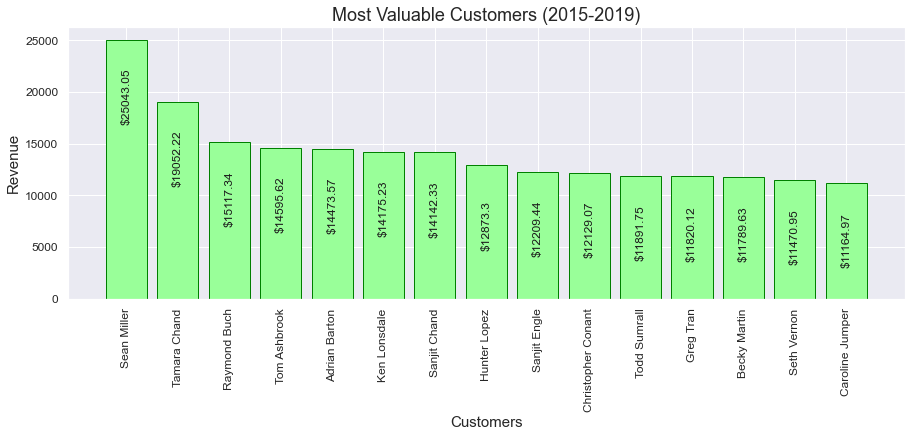

In [28]:
plt.figure(figsize = (15,5)) 
plt.title("Most Valuable Customers (2015-2019)", fontsize=18) 
plt.bar(Top_customers.index,Top_customers[('sum', 'Sales')].values,color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Customers",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers[('sum', 'Sales')].items(): 
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

### Top 15 States based on the sales sum

In [29]:
sales_sum2 = pd.pivot_table(data,index=["State"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_state = sales_sum2.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_state = Top_state[[('sum', 'Sales')]].round(2)

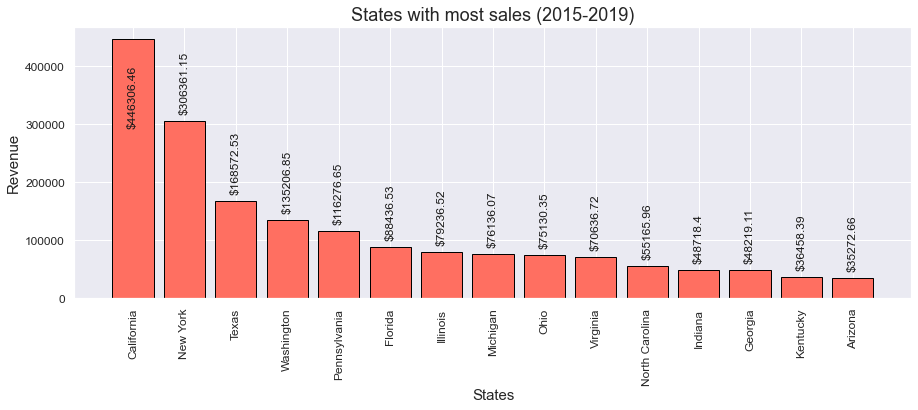

In [30]:
plt.figure(figsize = (15,5)) 
plt.title("States with most sales (2015-2019)", fontsize=18) 
plt.bar(Top_state.index,Top_state[('sum', 'Sales')].values,color= '#FF6F61',edgecolor='black', linewidth = 1)
plt.xlabel("States",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_state[('sum', 'Sales')].items():
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

### Top 15 Cities based on the sales sum

In [31]:
sales_sum3 = pd.pivot_table(data,index=["City"],values=["Sales"],aggfunc=[np.sum]) #Using Pivot table 
Top_city = sales_sum3.sort_values(by= [('sum', 'Sales')], ascending=False).head(15)
Top_city = Top_city[[('sum', 'Sales')]].round(2)

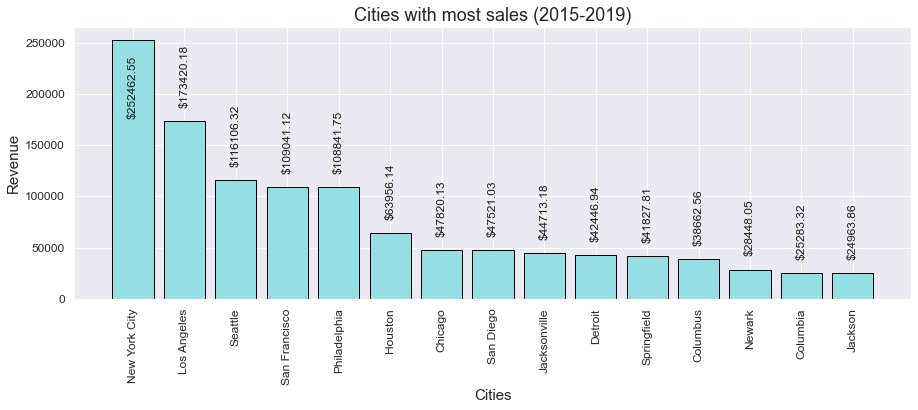

In [32]:
plt.figure(figsize = (15,5)) 
plt.title("Cities with most sales (2015-2019)", fontsize=18) 
plt.bar(Top_city.index,Top_city[('sum', 'Sales')].values,color= '#95DEE3',edgecolor='black', linewidth = 1)
plt.xlabel("Cities",fontsize=15) 
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_city[('sum', 'Sales')].items(): #To show the exact revenue generated on the figure
    if v>250000:
        plt.text(k,v-75000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

### Time Series Visuals

In [33]:
def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)

    return(df)

In [34]:
data2 = data.copy() 
data2.drop('Row ID',axis = 1, inplace = True)

old_date_format='%d/%m/%Y'
new_date_format='%Y-%m-%d'

data2 = conv_dates_series(data2, "Order Date", old_date_format, new_date_format)

In [35]:
df = data2.sort_values(by = "Order Date")
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 7980 to 5091
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


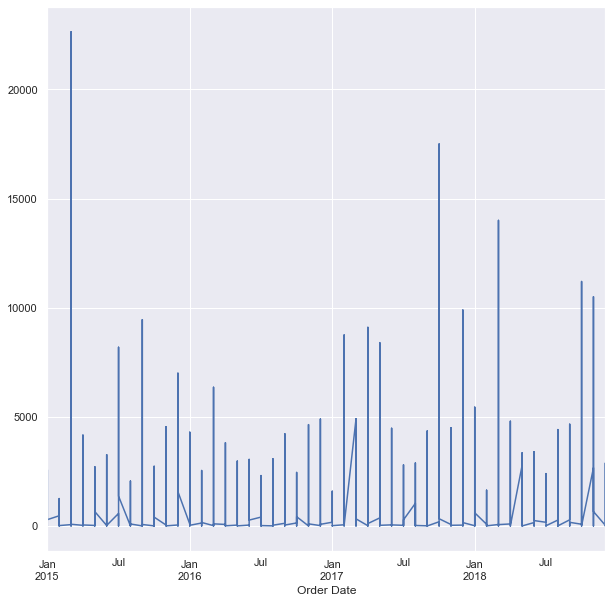

In [37]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.index = pd.PeriodIndex(df["Order Date"], freq='M')

df["Sales"].plot()

In [38]:
df['monthVal'] = pd.DatetimeIndex(df['Order Date']).month

df['Year'] = pd.DatetimeIndex(df['Order Date']).year

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,monthVal,Year
Order Date,,,,,,,,,,,,,,,,,,,
2015-01,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,1,2015
2015-01,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1,2015
2015-01,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,1,2015
2015-01,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,1,2015
2015-01,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,1,2015


In [39]:
dataPivot = pd.pivot_table(df, values = "Sales",aggfunc='mean', columns = "Year", index = "monthVal")
dataPivot

Year,2015,2016,2017,2018
monthVal,,,,
1,184.489701,316.964168,208.342596,304.031287
2,98.258522,186.740797,276.853193,191.548052
3,358.479201,252.650925,317.795398,248.368830
4,214.668115,214.807978,230.236708,177.709550
5,195.407463,209.507206,256.366100,182.608259
6,262.007142,182.940884,202.675949,205.066926
7,237.898190,210.354846,195.514199,201.009435
8,185.736551,233.027482,174.526859,293.634804
9,305.706093,221.521425,198.261865,190.182976


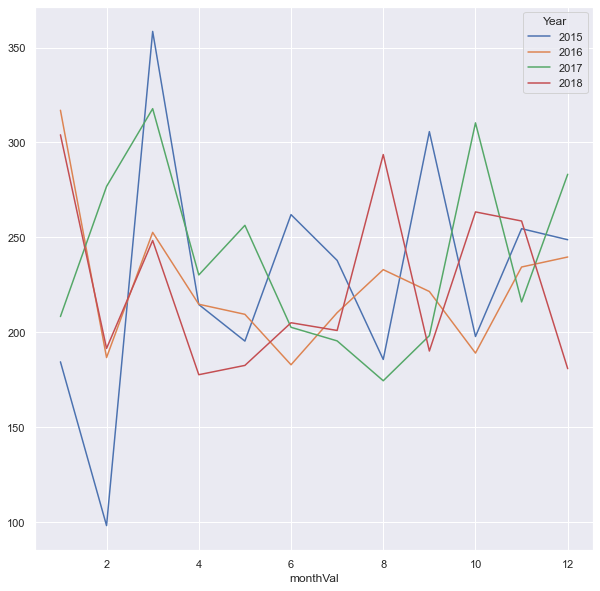

In [40]:
dataPivot.plot()

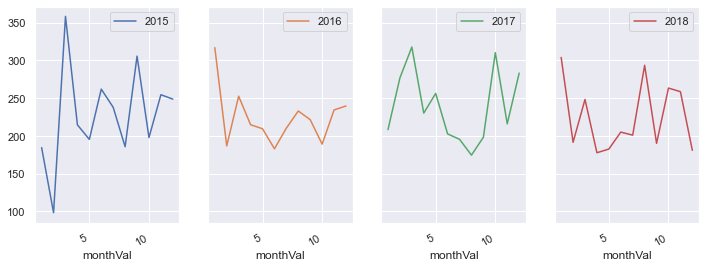

In [41]:
dataPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

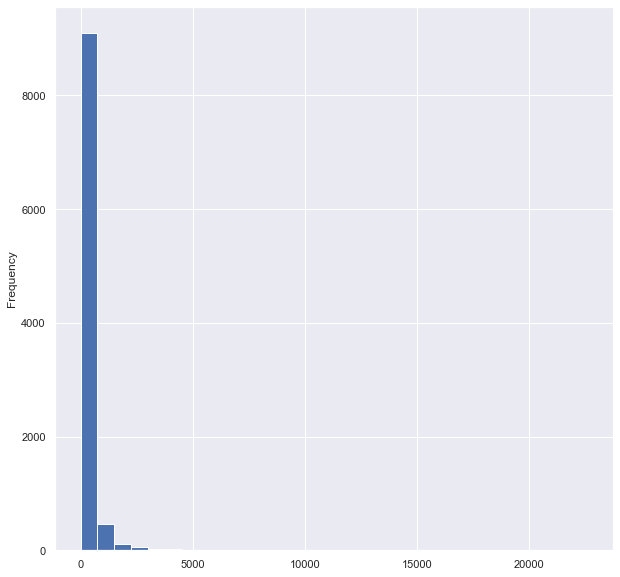

In [42]:
df["Sales"].plot(kind = "hist", bins = 30)

#### Transformation - Log

Transformations such as logarithms can help to stabilize the variance of a time series

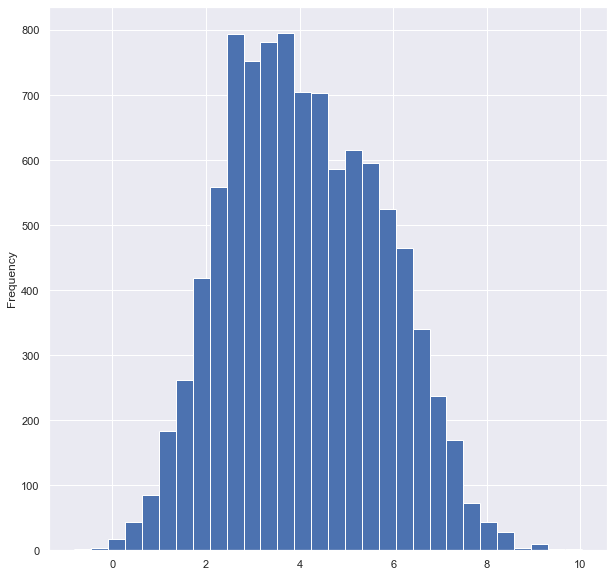

In [43]:
df['SalesLog'] = np.log(df["Sales"])
df.SalesLog.plot(kind = "hist", bins = 30)
sns.set(rc={'figure.figsize':(10,10)})

## Linear Regression

Use a time variable in prediction.

In [44]:
from sklearn.metrics import mean_squared_error
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [45]:
df_1 = data.copy()
df_1['Order Date'] = pd.to_datetime(df_1['Order Date'], format='%d/%m/%Y')#sorting data by order date
df_1.sort_values(by=['Order Date'], inplace=True, ascending=True) 
df_1.set_index("Order Date", inplace = True)

In [46]:
df_1['time'] = df_1.index.to_series().apply(lambda x: x.toordinal())

# Splitting the data into 70:30
X_train, X_test = df_1[['time']][:int(df_1.shape[0]*0.7)], df_1[['time']][int(df_1.shape[0]*0.7):]
y_train, y_test = df_1['Sales'][:int(df_1.shape[0]*0.7)], df_1['Sales'][int(df_1.shape[0]*0.7):]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6860, 1), (6860,), (2940, 1), (2940,))

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_pred_train, squared=False))
lr_pred = lr.predict(X_test)

print('RMSE on test: ', mean_squared_error(y_test, lr_pred, squared=False))

RMSE on train:  641.0775578755893
RMSE on test:  591.4451467202002


In [48]:
def plot_predict(ts, x_test, y_pred):
    plt.figure(figsize=(6, 3))
    plt.plot(x_test.index, y_pred, label = 'Predicted values', linewidth=2)
    ts.plot(label = 'True values')
    plt.legend(loc = 'best', fontsize = 12)
    plt.xlabel('Order Date', fontsize = 12)
    plt.show()

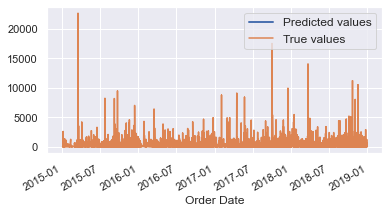

In [49]:
plot_predict(df_1['Sales'], X_test, lr_pred)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# check perfromance score
scores_lr = cross_val_score(LinearRegression(), 
                            X_train, y_train, 
                            cv=TimeSeriesSplit(n_splits=10),
                            scoring="neg_mean_squared_error")
np.mean(scores_lr)

-354505.86390160554

### Polynomial regression

We can add polynomial term see if this will improve the performance or not

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(
    PolynomialFeatures(include_bias=False), 
    LinearRegression())
lr_poly.fit(X_train, y_train)
lr_poly_pred_train = lr_poly.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_pred_train, squared=False))

lr_poly_pred = lr_poly.predict(X_test)

print('RMSE on test: ', mean_squared_error(y_test, lr_poly_pred, squared=False))

RMSE on train:  641.0654449811921
RMSE on test:  592.0103807893936


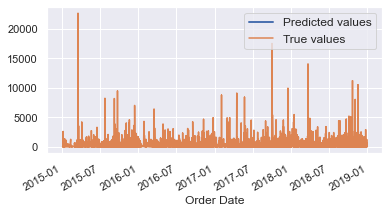

In [52]:
plot_predict(df_1['Sales'], X_test, lr_poly_pred)

In [53]:
scores_lr_poly = cross_val_score(lr_poly, 
                            X_train, y_train, 
                            cv=TimeSeriesSplit(n_splits=10),
                            scoring="neg_mean_squared_error")
np.mean(scores_lr_poly)

-356773.62440931075

Add a second variable in prediction.

In [54]:
df_1['month_num'] = df_1.index.month
X_train, X_test = df_1[['time', 'month_num']][:int(df_1.shape[0]*0.7)], df_1[['time', 'month_num']][int(df_1.shape[0]*0.7):]

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6860, 2), (6860,), (2940, 2), (2940,))

RMSE on train:  640.9307846663894
RMSE on test:  591.6101035713579


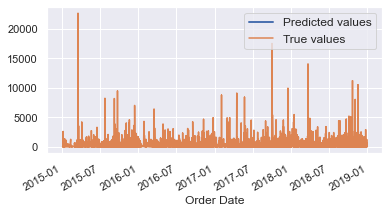

In [56]:
lr_poly.fit(X_train, y_train)
lr_poly_pred_train = lr_poly.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_pred_train, squared=False))
lr_poly_pred = lr_poly.predict(X_test)
print('RMSE on test: ', mean_squared_error(y_test, lr_poly_pred, squared=False))
plot_predict(df_1['Sales'], X_test, lr_poly_pred)

Treat the second variable as categorical.

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x_transformer = ColumnTransformer(
    [("cat", OneHotEncoder(sparse=False), ['month_num'])],
    remainder='passthrough')

X_train_trans = x_transformer.fit_transform(X_train)

In [58]:
lr_poly_cat = make_pipeline(
    x_transformer,
    PolynomialFeatures(include_bias=False), 
    LinearRegression())
lr_poly_cat.fit(X_train, y_train)
lr_poly_cat_train = lr_poly_cat.predict(X_train)

print('RMSE on train: ', mean_squared_error(y_train, lr_poly_cat_train, squared=False))
lr_poly_cat_pred = lr_poly_cat.predict(X_test)
print('RMSE on test: ', mean_squared_error(y_test, lr_poly_cat_pred, squared=False))

RMSE on train:  639.966729321841
RMSE on test:  595.1563000017117


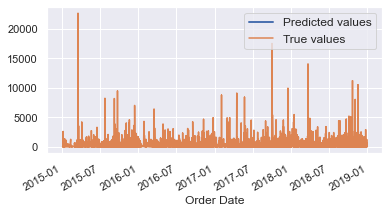

In [59]:
plot_predict(df_1['Sales'], X_test, lr_poly_cat_pred)

## Forecasting

In [60]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [61]:
data.drop('Row ID',axis = 1, inplace = True)
#sorting data by order date
data.sort_values(by=['Order Date'], inplace=True, ascending=True) 
data.set_index("Order Date", inplace = True)
data_new = pd.DataFrame(data['Sales'])
print(data_new.head())
data_new.tail()

              Sales
Order Date         
2015-01-03   16.448
2015-01-04    3.540
2015-01-04  272.736
2015-01-04   11.784
2015-01-05   19.536


,Sales
Order Date,
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300
2018-12-30,52.776
2018-12-30,3.024


In [62]:
data_new =  pd.DataFrame(data_new['Sales'].resample('D').mean())
data_new = data_new.interpolate(method='linear') 
#It ignore the index and treats the values as equally spaced.

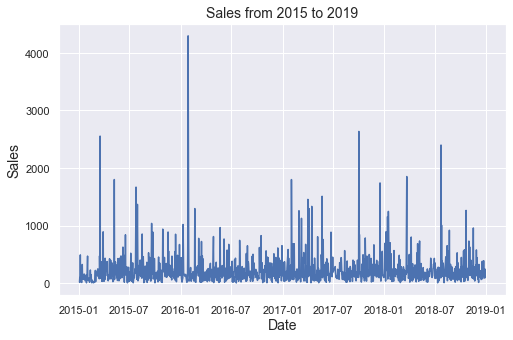

In [63]:
# Visualize the time series
plt.figure(figsize=(8, 5))

plt.plot(data_new.index, data_new.Sales)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.title('Sales from 2015 to 2019', fontsize = 14)
plt.show()

A series is said to be stationary when its mean and variance do not change over time. From the above distribution of the sales it is not clear whether the sales distribution is stationary or not. Let us perform some stationarity tests to check whether the time series is stationary or not.

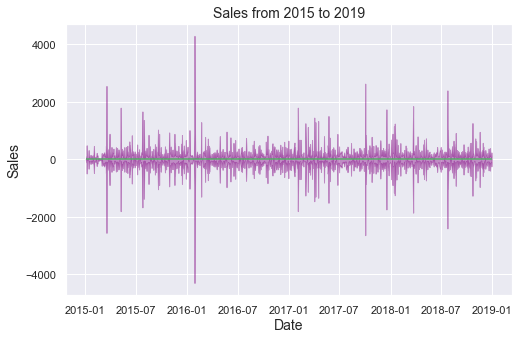

In [64]:
# Show this on both sides of the Y axis to emphasize the growth.
plt.figure(figsize=(8, 5))

plt.fill_between(data_new.index, data_new.Sales, -data_new.Sales, alpha = 0.4, color = 'purple')
plt.hlines(0, np.min(data_new.index), np.max(data_new.index), color = 'g')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.title('Sales from 2015 to 2019', fontsize = 14)
plt.show()

## Decomposing the time series

**Additive time series:**
Value = Level + Trend + Seasonality + Noise

**Multiplicative Time Series:**
Value = Level x Trend x Seasonality x Noise

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(data_new['Sales'], model='additive', extrapolate_trend='freq')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(data_new['Sales'], model='multiplicative', extrapolate_trend='freq')

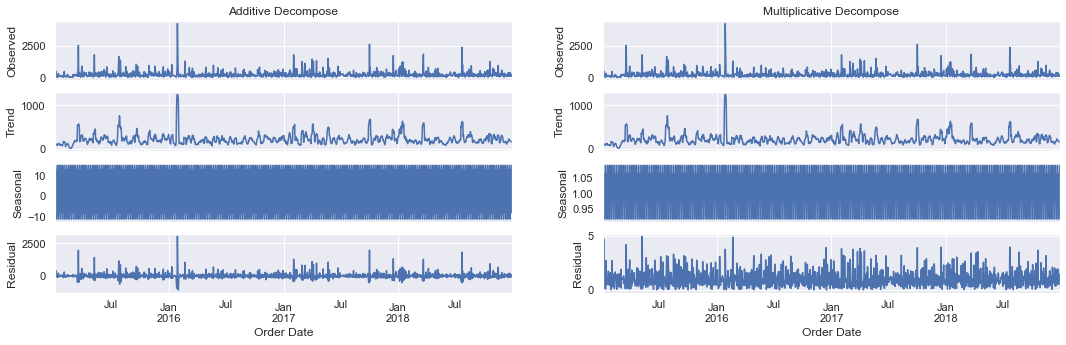

In [66]:
def plotseasonal(res, axes, suptitle):
    res.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed', fontsize=12)
    axes[0].set_title(suptitle, fontsize=12)
    res.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend', fontsize=12)
    res.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal', fontsize=12)
    res.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual', fontsize=12)
    
    
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(18,5))

plotseasonal(result_add, axes[:,0], 'Additive Decompose')
plotseasonal(result_mul, axes[:,1], 'Multiplicative Decompose')

## Check Stationarity for the Time Series

In [67]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(ts, do_adf=True, do_kpss = False):
    
    # Determing rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(8, 5))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', fontsize=12)
    plt.title('Rolling Mean & Standard Deviation', fontsize=12)
    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('Sales', fontsize = 12)
    plt.show(block=False)
    
    if do_adf:
        # Perform Augmented Dickey-Fuller test:
        print('Results of ADF Test:')
        dftest = adfuller(ts, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
    
    print() 
    
    if do_kpss:
        # Perform Kwiatkowski-Phillips-Schmidt-Shin test:
        print('Results of KPSS Test:')
        dftest = kpss(ts, regression='c')
        dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Truncated Lag #'])
        for key,value in dftest[3].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

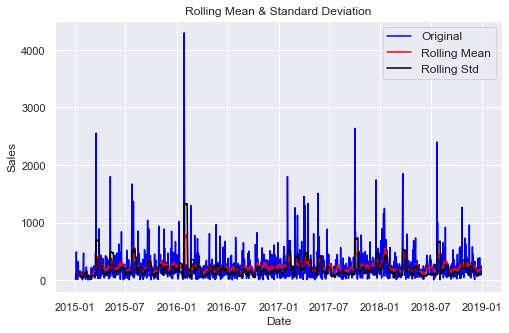

Results of ADF Test:
Test Statistic                  -20.809459
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    1455.000000
Critical Value (1%)              -3.434852
Critical Value (5%)              -2.863528
Critical Value (10%)             -2.567829
dtype: float64

Results of KPSS Test:
Test Statistic            0.10287
p-value                   0.10000
Truncated Lag #          24.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [68]:
test_stationarity(data_new.Sales, do_kpss = True)

<font color =red>**The mean seems to be stationary overtime. Also, the test statistic is les than the critical values. Note that the signed values should be compared and not the absolute values.**

**The test statistic is smaller than the 0.1% critical values so we can say with 99.9% confidence that this is a stationary series.**

# Forecasting Time Series

## ARIMA Model

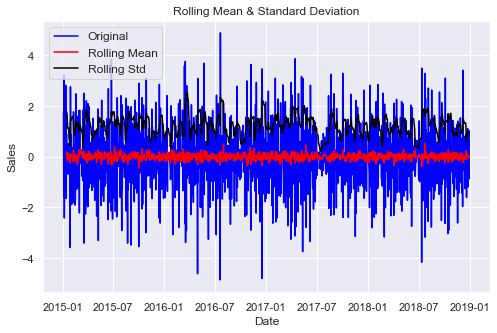

Results of ADF Test:
Test Statistic                -1.321953e+01
p-value                        1.008346e-24
#Lags Used                     2.300000e+01
Number of Observations Used    1.433000e+03
Critical Value (1%)           -3.434922e+00
Critical Value (5%)           -2.863559e+00
Critical Value (10%)          -2.567845e+00
dtype: float64



In [69]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

# Splitting the data into 70:30
train = data_new[:int(data_new.shape[0]*0.7)]
test = data_new[int(data_new.shape[0]*0.7):]

ts_log = np.log(data_new.Sales)
ts_log_diff = ts_log.diff()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [70]:
train.head()

,Sales
Order Date,
2015-01-03,16.448000
2015-01-04,96.020000
2015-01-05,19.536000
2015-01-06,489.677778
2015-01-07,43.579000


### Determining the parameters for the model

In [71]:
# Estimate ARIMA differencing term
# If the time series is constant, will return 0.
from pmdarima.arima.utils import ndiffs
y = ts_log

# ADF Test
print('Estimate differencing term from ADF: ', ndiffs(y, test='adf') )

# KPSS test
print('Estimate differencing term from KPSS: ', ndiffs(y, test='kpss') )

# PP test:
print('Estimate differencing term from PP: ', ndiffs(y, test='pp'))

Estimate differencing term from ADF:  0
Estimate differencing term from KPSS:  1
Estimate differencing term from PP:  0


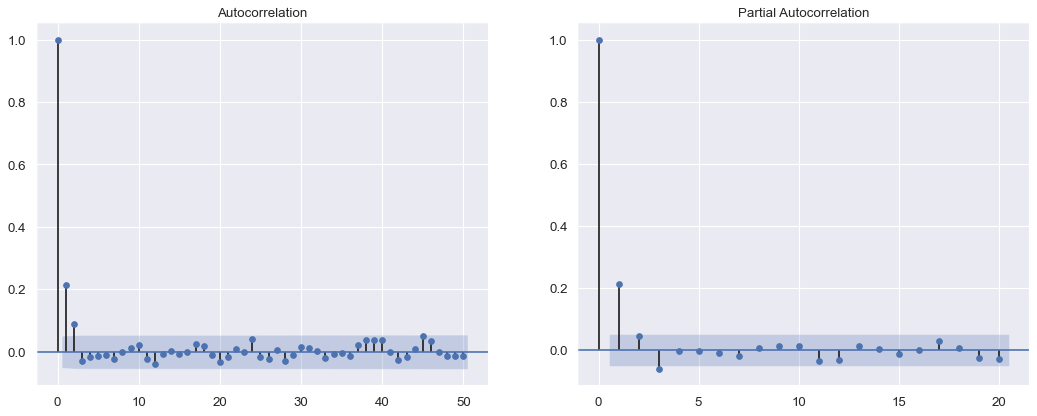

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(data_new.Sales.tolist(), ax=ax1, lags=50)
plot_pacf(data_new.Sales.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

<font color = red> **P and Q can be determined using the above correlation plots. We can create different models using the spike in the lags and then pick out the better model.**

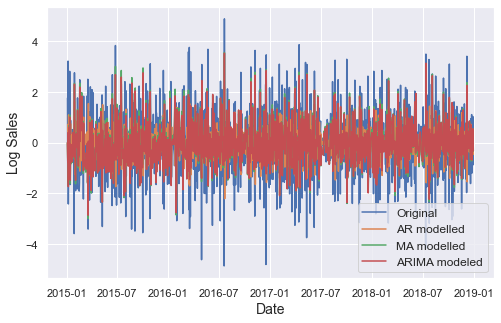

AR modelled RSS: 1764.6169
MA modelled RSS: 1319.1034
ARIMA modelled RSS: 1310.1206


In [73]:
from statsmodels.tsa.arima_model import ARIMA

## AR model: p = 1, d = 1, q = 0
model_AR = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model_AR.fit(disp = -1)  

## MA model: p = 0, d = 1, q = 2
model_MA = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model_MA.fit(disp = -1)  

## ARIMA model: p = 1, d = 1, q = 2
model_ARIMA = ARIMA(ts_log, order=(1, 1, 2))  
results_ARIMA = model_ARIMA.fit(disp = -1)


plt.figure(figsize = (8, 5))
plt.plot(ts_log_diff, label = 'Original')
plt.plot(results_AR.fittedvalues, label = 'AR modelled')
plt.plot(results_MA.fittedvalues, label = 'MA modelled')
plt.plot(results_ARIMA.fittedvalues, label = 'ARIMA modeled')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Log Sales', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()


print('AR modelled RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
print('MA modelled RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
print('ARIMA modelled RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

<font color = red> **ARIMA model is better based on the RSS value.**

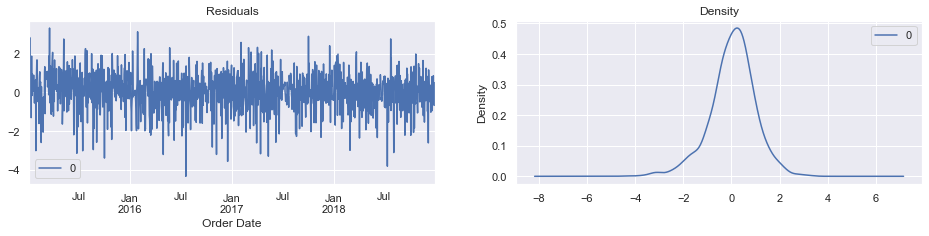

In [74]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1, 2, figsize = (16, 3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

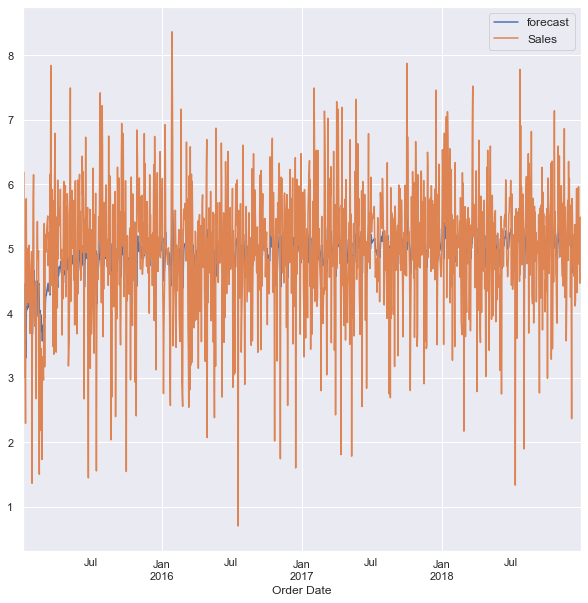

In [75]:
results_ARIMA.plot_predict(dynamic=False)
plt.legend(fontsize=12)
plt.show()

In [76]:
from statsmodels.tsa.stattools import acf

# Training and test split, approx 70%, 30%
'''
NOT sampling here, because the order sequence of the time series 
should be intact in order to use it for forecasting
'''

train = ts_log[:int(data_new.shape[0]*0.7)]
test = ts_log[int(data_new.shape[0]*0.7):]

# Build Model
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit()  

# Forecast, 95% confidence interval
fc, _, conf = fitted.forecast(438, alpha=0.05) 

# Make as pandas series for plotting
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [77]:
train.head()

Order Date
2015-01-03    2.800204
2015-01-04    4.564557
2015-01-05    2.972259
2015-01-06    6.193748
2015-01-07    3.774575
Freq: D, Name: Sales, dtype: float64

In [78]:
arima_train = fitted.predict(end = len(train), dynamic=False)
print('RMSE on train: ', mean_squared_error(train, arima_train, squared=False))
arima_test = fitted.predict(start=pd.to_datetime('2017-10-19'), end = pd.to_datetime('2018-12-30'), dynamic=False)
print('RMSE on test: ', mean_squared_error(test, arima_test, squared=False))

RMSE on train:  5.291434549209798
RMSE on test:  5.155466433402649


In [79]:
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                 1019
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1423.534
Method:                       css-mle   S.D. of innovations              0.975
Date:                Sat, 05 Dec 2020   AIC                           2857.067
Time:                        08:15:06   BIC                           2881.700
Sample:                    01-04-2015   HQIC                          2866.421
                         - 10-18-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.298      0.022    4.72e-05       0.001
ar.L1.D.Sales     0.4369      0.108      4.027      0.000       0.224       0.650
ma.L1.D.Sales    -1.2422      0.116    -

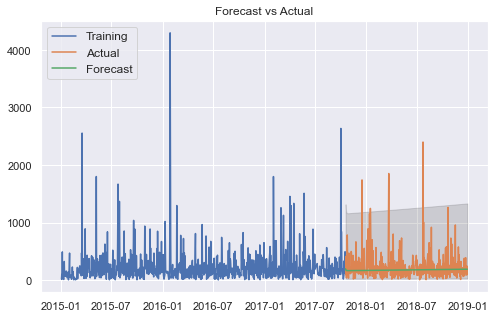

In [80]:
# Plot
plt.figure(figsize=(8,5))
plt.plot(np.exp(train), label='Training')
plt.plot(np.exp(test), label='Actual')
plt.plot(np.exp(fc_series), label='Forecast')
plt.fill_between(lower_series.index, np.exp(lower_series), np.exp(upper_series), 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual', fontsize = 12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## FBProphet

In [81]:
sales = pd.DataFrame(data_new.Sales).reset_index()

# rename columns to fit Prophet
sales.columns = ['ds', 'y']
sales.shape[0]

1458

In [82]:
from fbprophet import Prophet

X_tr = sales[:int(sales.shape[0]*0.7)]
X_tst = sales[int(sales.shape[0]*0.7):]

print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

Importing plotly failed. Interactive plots will not work.


train shape (1020, 2)
test shape (438, 2)


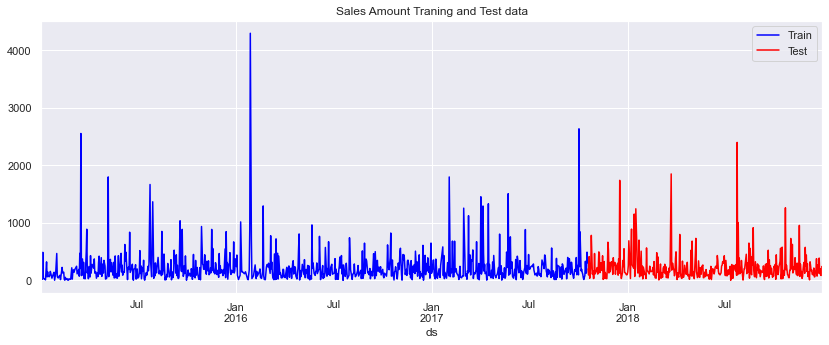

In [83]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [84]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [85]:
model_fb =Prophet()
model_fb.fit(X_tr)
X_tr_forecast = model_fb.predict(X_tr)
print('RMSE on train: ', mean_squared_error(X_tr['y'], X_tr_forecast['yhat'], squared=False))
X_tst_forecast = model_fb.predict(X_tst)
print('RMSE on test: ', mean_squared_error(X_tst['y'], X_tst_forecast['yhat'], squared=False))
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE on train:  273.98383843119893
RMSE on test:  245.3355167151633


,ds,yhat,yhat_lower,yhat_upper
431,2018-12-24,274.131031,-74.130972,621.507318
432,2018-12-25,250.624169,-115.329225,595.274244
433,2018-12-26,296.069608,-81.139209,650.217229
434,2018-12-27,278.343238,-75.771834,662.252150
435,2018-12-28,244.471801,-119.710647,579.457316
436,2018-12-29,227.236772,-108.494222,573.842699
437,2018-12-30,247.488208,-100.257107,598.092580


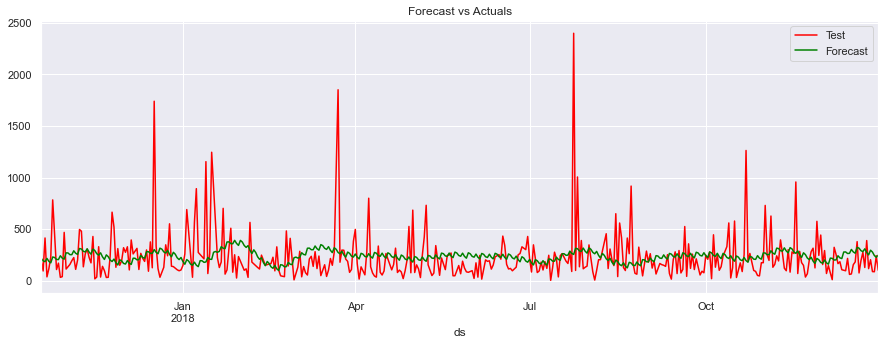

In [86]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

<font color = red>**We can see from the above plot, that there is huge gap in prediction. So we need to optimize the model by adding other parameters like holidays, changepoints etc.**

In [87]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE 161.889


### Parameter Tuning

In [88]:
import holidays

holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

holiday.head()

,ds,holiday
0,2018-01-01,US-Holidays
1,2018-01-15,US-Holidays
2,2018-02-19,US-Holidays
3,2018-05-28,US-Holidays
4,2018-07-04,US-Holidays


In [89]:
#train model with holidays
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)

X_tr_forecast_holiday = model_with_holidays.predict(X_tr)
print('RMSE on train: ', mean_squared_error(X_tr['y'], X_tr_forecast_holiday['yhat'], squared=False))
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
print('RMSE on test: ', mean_squared_error(X_tst['y'], X_tst_forecast_holiday['yhat'], squared=False))
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE on train:  273.98383843119893
RMSE on test:  245.3355167151633


,ds,yhat,yhat_lower,yhat_upper
431,2018-12-24,274.131031,-77.713187,623.443668
432,2018-12-25,250.624169,-113.525507,597.028492
433,2018-12-26,296.069608,-53.814299,689.222918
434,2018-12-27,278.343238,-91.547318,630.534598
435,2018-12-28,244.471801,-106.673512,590.503348
436,2018-12-29,227.236772,-94.068247,583.861702
437,2018-12-30,247.488208,-108.713502,558.320513


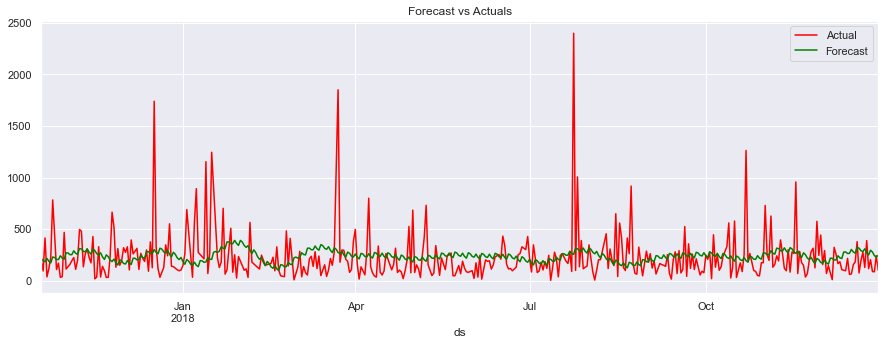

In [90]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [91]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape,4))

MAPE 161.889


<font color=red>**There is not much of an improvement even after adding holidays. We need to further tune the parameters.** 

### HyperParameter Tuning using ParameterGrid

In [92]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [93]:
import random

model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.predict(X_tr)
    test=train_forecast[['ds','yhat']]
    MAPE = mean_absolute_percentage_error(X_tr['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 206.92241926964644
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 207.313329370986
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 206.97438935573524
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 207.1735393520648
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(M

Mean Absolute Percentage Error(MAPE)------------------------------------ 205.71170196221718
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 204.74102808048676
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 205.64630139352852
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 203.88040559796013
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 205.5241311536494
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3,

Mean Absolute Percentage Error(MAPE)------------------------------------ 203.1951150921895
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 204.4458570456336
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 202.90746423505377
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 204.51080979080328
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 202.8179486134992
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, '

Mean Absolute Percentage Error(MAPE)------------------------------------ 203.82312279687545
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 202.39276394662363
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 203.81765945326785
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 196.90416491536803
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 203.66348513083076
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1

In [94]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,195.314403,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
1,196.751286,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
2,196.904165,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
3,198.201423,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
4,198.668754,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."


In [95]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.5,
 'holidays_prior_scale': 0.2,
 'n_changepoints': 150,
 'seasonality_mode': 'multiplicative'}

In [96]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.3,
                      n_changepoints = 150,
                      seasonality_mode = 'multiplicative')
final_model.add_country_holidays(country_name='US')
final_model.fit(X_tr)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
X_tr_final_forecast = final_model.predict(X_tr)
print('RMSE on train: ', mean_squared_error(X_tr['y'], X_tr_final_forecast['yhat'], squared=False))
X_tst_final_forecast = final_model.predict(X_tst)
print('RMSE on test: ', mean_squared_error(X_tst['y'], X_tst_final_forecast['yhat'], squared=False))
X_tst_final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

RMSE on train:  270.32208767408855
RMSE on test:  252.81085591548782


,ds,yhat,yhat_lower,yhat_upper
431,2018-12-24,306.182400,-122.667644,713.556286
432,2018-12-25,255.237216,-100.013984,651.692714
433,2018-12-26,325.610810,-54.999902,727.538439
434,2018-12-27,314.372360,-91.981245,736.993072
435,2018-12-28,267.858073,-105.198837,682.640582
436,2018-12-29,240.273776,-124.255988,630.229576
437,2018-12-30,260.635884,-141.241284,641.208125


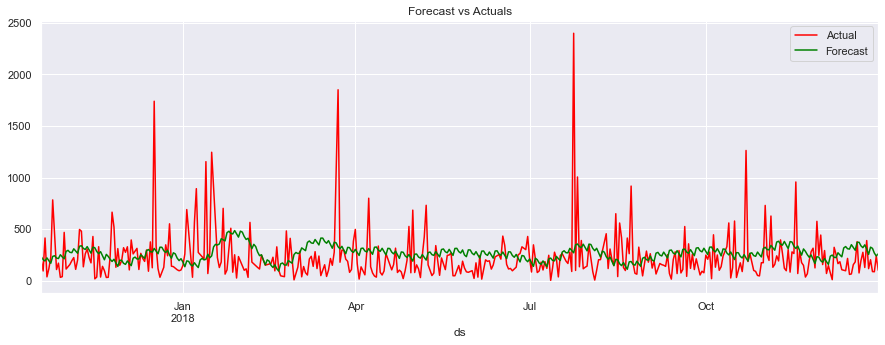

In [98]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

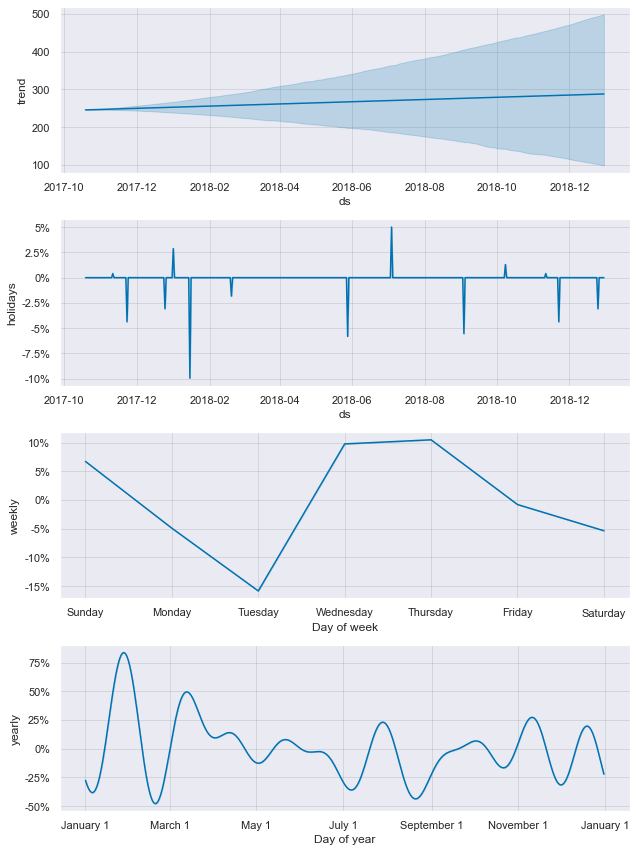

In [99]:
# Plot the components of the model
fig = final_model.plot_components(X_tst_final_forecast)

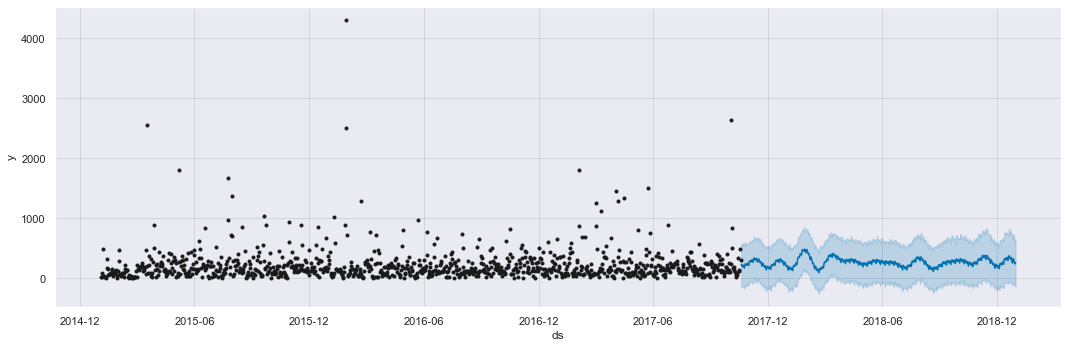

In [100]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(X_tst_final_forecast,ax=ax)
plt.show()

In [101]:
MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final_forecast['yhat']))
print('MAPE', MAPE)

MAPE 186.9868854752305


<font color =red> **There is not much of a big improvement even after tuning the parameters. The default parameters gave a better model with less Mean Absolute Error.**

### SARIMAX model (Seasonal ARIMA model)

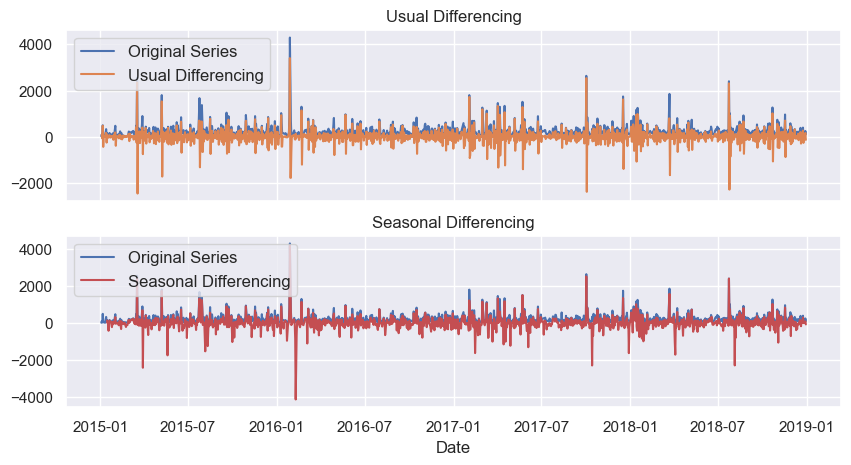

In [102]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data_new[:], label='Original Series')
axes[0].plot(data_new[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize = 12)

# Seasinal Differencing
axes[1].plot(data_new[:], label='Original Series')
axes[1].plot(data_new[:].diff(12), label='Seasonal Differencing', color='r')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.show()


In [103]:
# Splitting the data into 70:30
train = data_new[:int(data_new.shape[0]*0.7)]
test = data_new[int(data_new.shape[0]*0.7):]

In [104]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

#determining the best combination of seasonal parameters for SARIMAX
for parameters in pdq: 
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) 
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

In [105]:
import statsmodels.api as sm

#Training the SARIMA model using seasonal parameters with least AIC value
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit()
#result
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      0.013     19.568      0.000       0.225       0.275
ma.L1         -1.0000     12.100     -0.083      0.934     -24.715      22.715
ar.S.L12      -0.0328      0.040     -0.812      0.417      -0.112       0.046
ma.S.L12      -1.0000     12.093     -0.083      0.934     -24.702      22.702
sigma2      7.444e+04    4.1e-05   1.82e+09      0.000    7.44e+04    7.44e+04


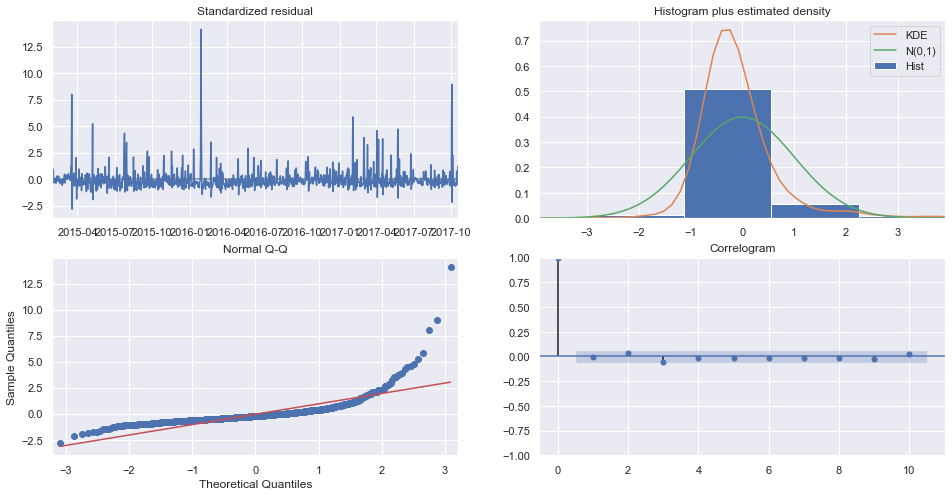

In [106]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#### Above plots are: 
1. Standardized residuals over time 
2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
3. Normal Q-Q plot, with Normal reference line
4. Correlogram.

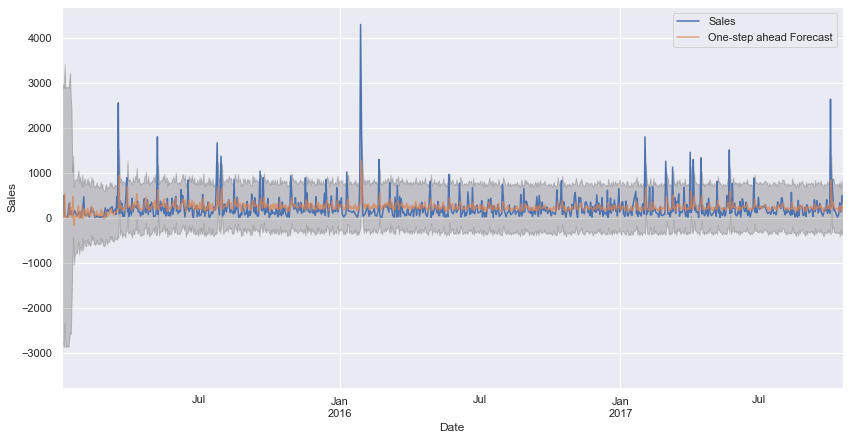

In [107]:
# variable to display plot for predicted values
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) 
pred_val = pred.conf_int()
 # displays plot for original values
ax = train['2014':].plot(label='observed')
# displays plot for predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) 
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [108]:
y_forecasted = pred.predicted_mean
y_truth = train['Sales']

print('RMSE on train: ', mean_squared_error(y_forecasted, y_truth, squared=False))

RMSE on train:  278.4363323966865


In [109]:
print(test.head(1))
test.tail(1)

               Sales
Order Date          
2017-10-19  201.2687


,Sales
Order Date,
2018-12-30,101.97


In [110]:
pred_test = results.predict(start=pd.to_datetime('2017-10-19'), end = pd.to_datetime('2018-12-30'), dynamic=False)

In [111]:
pred_test.head()

2017-10-19    240.766554
2017-10-20    216.467838
2017-10-21    225.158444
2017-10-22    234.133112
2017-10-23    249.149906
Freq: D, dtype: float64

In [112]:
print('RMSE on test: ', mean_squared_error(pred_test, test, squared=False))

RMSE on test:  240.54730114610223


In [113]:
# making a forecast of 7 days later of the last date in the 'Order Date' column
forecast = results.forecast(steps=len(test) + 7)

#displays the sales forecast as type integer
print(forecast.astype('int')[-7:]) 

2018-12-31    286
2019-01-01    264
2019-01-02    244
2019-01-03    229
2019-01-04    199
2019-01-05    253
2019-01-06    235
Freq: D, dtype: int32


In [115]:
# Model selection
index = ['Linear Regression', 'Polynomial Regression', 'ARIMA', 'FBProphet', 'SARIMAX']
performance = pd.DataFrame({"Train_RMSE": [641.08, 640.93, 5.29, 270.32, 278.44], "Test_RMSE": [591.45, 591.61, 5.16, 252.81, 240.55]}, index=index)
performance

,Train_RMSE,Test_RMSE
Linear Regression,641.08,591.45
Polynomial Regression,640.93,591.61
ARIMA,5.29,5.16
FBProphet,270.32,252.81
SARIMAX,278.44,240.55


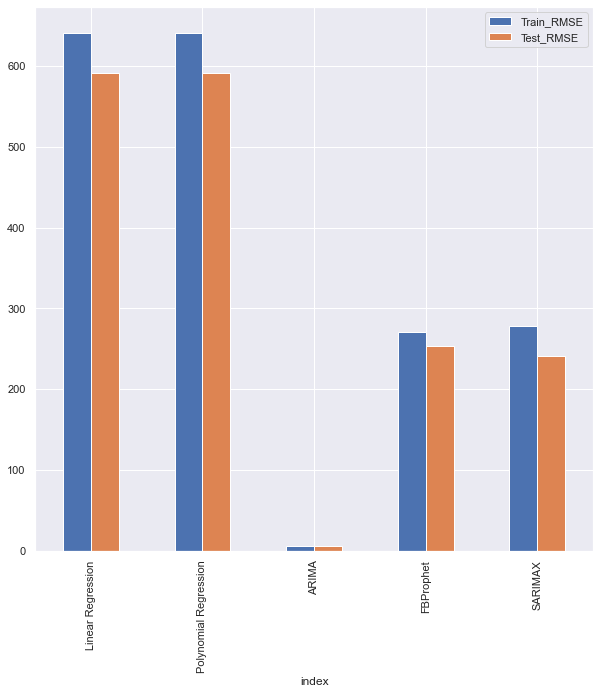

In [116]:
# RMSE score Graph
performance.reset_index().plot(x='index' ,y=['Train_RMSE', 'Test_RMSE'],kind='bar')

#### Model which gives lowest Root Mean Square Error (RMSE) value is preferred. From the above graph, ARIMA is giving better results on both train and test data. We will be using this ARIMA model for forecasting sales value.